In [1]:
import osmnx as ox
import networkx as nx
import numpy as np
import pandas as pd
import folium

In [2]:
import os
os.chdir('../')

In [3]:
from roc_bike_growth.graph_utils import get_street_segment, get_intersections
from roc_bike_growth.loader import carall_from_polygon, load_roc_proposed

## Downloading the data as a graph and visualizing

In [4]:
gdf = ox.geocode_to_gdf('rochester, ny')

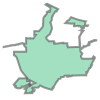

In [5]:
gdf.geometry[0]

In [6]:
carall = carall_from_polygon(gdf.geometry[0])

## Visualizing specific streets or segments of streets

To query by attributes like street name, we can download the network as a geodataframe.

In [76]:
tab_form = ox.geometries.geometries_from_polygon(gdf.geometry[0],tags={'highway':True})

### `street` like Broad St

The [TIGER](https://wiki.openstreetmap.org/wiki/TIGER) attributes seem to be the most useful for this type of query.

In [41]:
broad_street = tab_form[tab_form['tiger:name_base']=='Broad']

NameError: name 'tab_form' is not defined

In [231]:
m = folium.Map(location=[43.15, -77.6750], tiles="Stamen Toner", zoom_start=13)

folium.GeoJson(broad_street[['name','geometry']].to_json(), name='Broad Street'
).add_to(m)

In [232]:
m

## Intersection of Broad and Allen

In [235]:
allen_street = tab_form[tab_form['tiger:name_base']=='Allen']

In [236]:
first_intersection = broad_street.sjoin(allen_street[['geometry','name']], how='inner', rsuffix='r').iloc[0]

In [285]:
first_intersection

highway                                               primary
geometry    LINESTRING (-77.6252208 43.1581155, -77.625149...
ref                                                     NY 31
railway                                                   NaN
old_ref                                                   NaN
                                  ...                        
ways                                                      NaN
type                                                      NaN
index_r0                                                  way
index_r1                                             68312333
name_r                                           Allen Street
Name: (way, 597508984), Length: 189, dtype: object

In [237]:
intersection_point = (
    first_intersection.geometry.intersection(
        allen_street.loc[(first_intersection['index_r0'], first_intersection['index_r1']),:].geometry))

In [233]:
folium.Marker(location=(intersection_point.coords[0][1],intersection_point.coords[0][0]) , name='Allen St. Intersection'
).add_to(m)

In [234]:
m

### Broad St, between Smith and Allen

Many of the reccommended enhancements are posed in this way, for example in the Bikeable Cities report, they provide a list of priorities:

> 
> - Broad St between Smith and Allen – 32 feet wide, on-street parking present
> - Genesee St south of Melrose – 43 feet wide, on-street parking present
> - Portland Ave between North and Central Park – 43 feet wide, on-street parking present
> - Monroe Ave between Howell and Alexander – 43 feet wide, on-street parking present
> - Monroe Avenue east of Goodman Street – 46 feet wide, on- street parking present

After some digging, I think this is best done by iterating through the graph, rather than the GDF. Check out `graph_utils.py` to see `get_street_segement()`. 

In [9]:
proposed = load_roc_proposed(carall=carall)

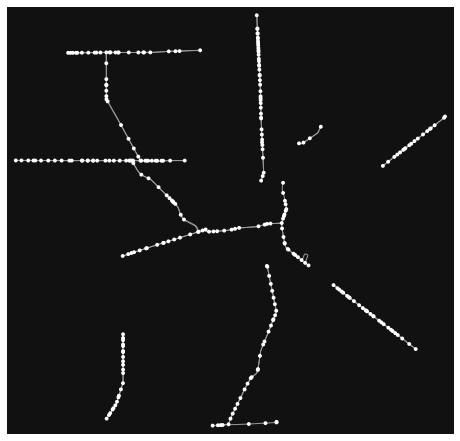

(<Figure size 576x576 with 1 Axes>, <AxesSubplot:>)

In [14]:
ox.plot.plot_graph(proposed)

In [12]:
ox.folium.plot_graph_folium(proposed)